## ASSIGNMENT - CNN 

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers.normalization import BatchNormalization


In [2]:
data = pd.read_csv('mnist.csv') #data source kaggle

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
y = data['label']
X = data.drop('label', axis = 1)

/home/mohit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


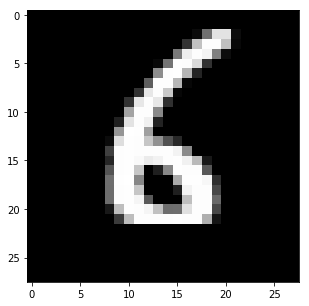

6


In [6]:
# display or plot a number.

plt.figure(figsize=(5,5))
idx = 45
grid_data = X.iloc[idx].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(y[idx])  ## code source t-SNE code available on course . . . .

In [7]:
# train and test set forming .  . . .

split = int(data.shape[0]*0.7)

X_train = X.iloc[:split,:].values
y_train = y.iloc[:split].values

X_test = X.iloc[split:,:].values
y_test = y.iloc[split:].values

In [8]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((29399, 784), (29399,), (12601, 784), (12601,))

In [9]:
# Reshaping data into desired format 
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [10]:
X_train[0].shape

(1, 28, 28)

In [11]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [12]:
num_classes

10

### MODEL1

ABOUT MODEL1:
    - 1st convolutional layer consists of 16 kernals with each of 5x5 shape, since input image is of 28x28 output shape can be calculated as 28 -5 +1 X 28-5+1 i.e. 24x24, and 16 such images are generated.
    - kernels can be used to extract important features from the image like horizontal edge or vertical edge etc.
    - Next layer is max pooling layer which convolute with a image, it reduces only important important from a section of image, despite of angle , size of information.
    - 2nd convolutional layer consists of 16 kernels but now kernel size is 2x2, hence output shape is 8x16 as after applying max pooling image size further reduce to half.
    - flatten layer converts 2-d image to 1-d by flattening the output of previous layer.
    - since this is a multiclass classification problem softmax is used as actication function which is extension of logistic function. It will return probability of every point belonging to every class.
 
 

In [13]:
##model building , building a Multi layer perceptron

model1 = Sequential()
#convolutional layer with rectified linear unit activation
model1.add(Conv2D(16, data_format = 'channels_first' ,kernel_size=(5,5), 
                  activation='relu', input_shape = (1,28,28)))
# Max pooling layer with filter of shape 2 x 2
model1.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd convolutional layer 
model1.add(Conv2D(16, (5,5), activation='relu'))
# MAx pooling layer after 2nd convolutional layer
model1.add(MaxPooling2D(pool_size=(2, 2)))

#flatten since too many dimensions, we only want a classification output
model1.add(Flatten())
#fully connected to get all relevant data

model1.add(Dense(128, activation='relu'))

model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 24, 24)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 12, 24)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 8, 16)          9616      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

##### In model1 i used 16 filters in layer 1 of size 5x5 each and input image is of size 32 x 32 therefore output of this layer is of shape 16 x (28-5+1) x(28-5+1) where 16 denotes no of output images generated corresponding to every filter.
##### Now this image is inputed to max pool layer which extract important info from the image 
##### Then this output inputed in next convolutional layer again containing 16 filters of 5 x 5 each.
##### Finally we add a flatten layer in model.
##### In dense_8 layer output is of shape 10 corresponding to each digit.

In [15]:
# fitting model1 on traing data . . . . 

hist1 = model1.fit(X_train, y_train, validation_split= 0.25 , nb_epoch= 30, batch_size= 128)

Train on 22049 samples, validate on 7350 samples
Epoch 1/30
  128/22049 [..............................] - ETA: 22s - loss: 0.1726 - acc: 0.9375

/home/mohit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


22049/22049 [==============================] - 26s 1ms/step - loss: 0.1436 - acc: 0.9562 - val_loss: 0.1603 - val_acc: 0.9510
Epoch 2/30
22049/22049 [==============================] - 26s 1ms/step - loss: 0.1056 - acc: 0.9673 - val_loss: 0.1159 - val_acc: 0.9627
Epoch 3/30
22049/22049 [==============================] - 27s 1ms/step - loss: 0.0842 - acc: 0.9743 - val_loss: 0.1131 - val_acc: 0.9675
Epoch 4/30
22049/22049 [==============================] - 24s 1ms/step - loss: 0.0707 - acc: 0.9786 - val_loss: 0.1010 - val_acc: 0.9694
Epoch 5/30
22049/22049 [==============================] - 24s 1ms/step - loss: 0.0620 - acc: 0.9808 - val_loss: 0.0959 - val_acc: 0.9713
Epoch 6/30
22049/22049 [==============================] - 24s 1ms/step - loss: 0.0541 - acc: 0.9825 - val_loss: 0.0925 - val_acc: 0.9733
Epoch 7/30
22049/22049 [==============================] - 24s 1ms/step - loss: 0.0459 - acc: 0.9856 - val_loss: 0.0903 - val_acc: 0.9735
Epoch 8/30
22049/22049 [============================

In [16]:
# Final evaluation of the model

scores1 = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores1[1]*100))

Accuracy: 97.83%


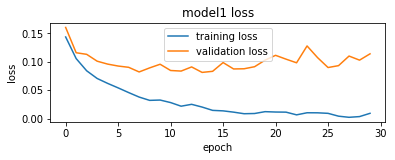

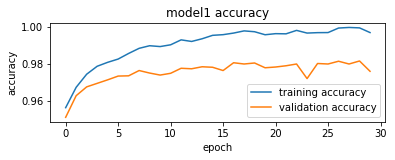

In [18]:
plt.subplot(2,1,1)
# plt.ylim(0,1)

plt.plot(hist1.history['loss'] , label = 'training loss')
plt.plot(hist1.history['val_loss'] , label = 'validation loss')
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.subplot(2,1,2)
# plt.ylim(0,1)
plt.plot(hist1.history['acc'], label = 'training accuracy')
plt.plot(hist1.history['val_acc'],  label = 'validation accuracy')
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()


Model1 tends to overfit as no of increases specially at the end which can be visualize as validation curve tends to move away from training loss curve for higher epoch value.

Reason for overfitting can be too much of training without much regularization.

although model is not much overfitted it is in beginning stage of overfitting.


## MODEL2

ABOUT MODEL2:
   
    - Conv layer_1 -> no of kkernels = 32 of size 2 x2 which generates an output image of 28-2+1 x28-2+1 i.e. 27x27 , and here 32 such images will be generated i.e. 1 image corresponding to each kernel.
    - In model2 batch normalization layer also added by keeping in mind previous model overfitting, batch normalization is also considered a step for regularization and in cases of CNN it often consider better as compare to dropout, batch normalization helps to resolve issue of covariance shift.
    Conv layer_2 -> no of kernels = 32 
    - flatten layer converts 2-d image to 1-d by flattening the output of previous layer.
    - since this is a multiclass classification problem softmax is used as actication function which is extension of logistic function. It will return probability of every point belonging to every class.
 
 

In [21]:
##model building
model2 = Sequential()
#convolutional layer with rectified linear unit activation
model2.add(Conv2D(32, data_format = 'channels_first' ,kernel_size=(2,2), 
                  activation='relu', input_shape = (1,28,28)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())


model2.add(Conv2D(32, (2,2), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())


model2.add(Flatten())


#fully connected to get all relevant data
model2.add(Dense(128, activation='relu'))

model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 27, 27)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 13, 27)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 13, 27)        108       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 12, 32)        3488      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 6, 32)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 6, 32)          128       
_________________________________________________________________
flatten_2 (Flatten)          (None, 1344)              0         
__________

In [22]:
hist2 = model2.fit(X_train, y_train, validation_split= 0.25 , nb_epoch= 30, batch_size= 128)

/home/mohit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 22049 samples, validate on 7350 samples
Epoch 1/30
22049/22049 [==============================] - 58s 3ms/step - loss: 0.2914 - acc: 0.9100 - val_loss: 0.1471 - val_acc: 0.9540
Epoch 2/30
22049/22049 [==============================] - 56s 3ms/step - loss: 0.0918 - acc: 0.9712 - val_loss: 0.1153 - val_acc: 0.9652
Epoch 3/30
22049/22049 [==============================] - 56s 3ms/step - loss: 0.0479 - acc: 0.9853 - val_loss: 0.0998 - val_acc: 0.9709
Epoch 4/30
22049/22049 [==============================] - 56s 3ms/step - loss: 0.0245 - acc: 0.9930 - val_loss: 0.1001 - val_acc: 0.9705
Epoch 5/30
22049/22049 [==============================] - 55s 3ms/step - loss: 0.0132 - acc: 0.9966 - val_loss: 0.0902 - val_acc: 0.9736
Epoch 6/30
22049/22049 [==============================] - 55s 2ms/step - loss: 0.0081 - acc: 0.9984 - val_loss: 0.0864 - val_acc: 0.9755
Epoch 7/30
22049/22049 [==============================] - 55s 3ms/step - loss: 0.0057 - acc: 0.9987 - val_loss: 0.0841 - val_acc:

In [23]:
# Final evaluation of the model

scores2 = model2.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores2[1]*100))

Accuracy: 98.24%


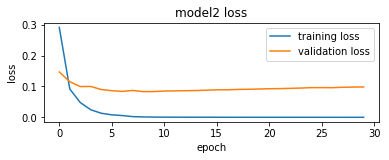

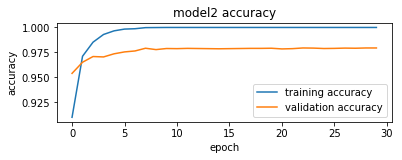

In [24]:
plt.subplot(2,1,1)
plt.plot(hist2.history['loss'] , label = 'training loss')
plt.plot(hist2.history['val_loss'] , label = 'validation loss')
plt.title('model2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.subplot(2,1,2)
plt.plot(hist2.history['acc'], label = 'training accuracy')
plt.plot(hist2.history['val_acc'],  label = 'validation accuracy')
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()


Although model2 trained for same no of epoch and have almost similar architecture compare to previous model but model doesn't overfitts as both validation loss curve and training loss curve noves parallel after converging and are never diverges at any epoch.

Model2 works fine too in optimizing as loss is less then model1.

## MODEL3

In [25]:
##model building
model3 = Sequential()
#convolutional layer with rectified linear unit activation
model3.add(Conv2D(64,strides=2, data_format = 'channels_first' ,kernel_size=(3,3),
                  activation='relu', input_shape = (1,28,28)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(BatchNormalization())

model3.add(Conv2D(64, (3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())

# model3.add(Dropout(0.25))

model3.add(Flatten())
#fully connected to get all relevant data
model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())


model3.add(Dense(num_classes, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 13, 13)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 6, 13)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 6, 13)         52        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 4, 64)         7552      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 2, 64)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 15, 2, 64)         256       
_________________________________________________________________
flatten_3 (Flatten)          (None, 1920)              0         
__________

In [31]:
hist3 = model3.fit(X_train, y_train, validation_split= 0.25 , nb_epoch= 30, batch_size= 64)

/home/mohit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 22049 samples, validate on 7350 samples
Epoch 1/30
22049/22049 [==============================] - 35s 2ms/step - loss: 0.0031 - acc: 0.9995 - val_loss: 0.0756 - val_acc: 0.9810
Epoch 2/30
22049/22049 [==============================] - 37s 2ms/step - loss: 0.0052 - acc: 0.9985 - val_loss: 0.0984 - val_acc: 0.9771
Epoch 3/30
22049/22049 [==============================] - 39s 2ms/step - loss: 0.0105 - acc: 0.9967 - val_loss: 0.0993 - val_acc: 0.9778
Epoch 4/30
22049/22049 [==============================] - 42s 2ms/step - loss: 0.0134 - acc: 0.9956 - val_loss: 0.1033 - val_acc: 0.9762
Epoch 5/30
22049/22049 [==============================] - 42s 2ms/step - loss: 0.0099 - acc: 0.9966 - val_loss: 0.0971 - val_acc: 0.9761
Epoch 6/30
22049/22049 [==============================] - 44s 2ms/step - loss: 0.0056 - acc: 0.9981 - val_loss: 0.0941 - val_acc: 0.9792
Epoch 7/30
22049/22049 [==============================] - 45s 2ms/step - loss: 0.0043 - acc: 0.9987 - val_loss: 0.1072 - val_acc:

In [32]:
# Final evaluation of the model

scores3 = model3.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores3[1]*100))

Accuracy: 98.40%


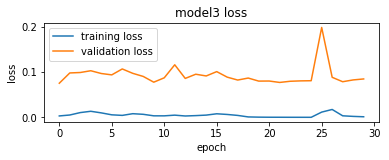

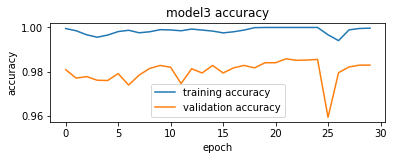

In [33]:
plt.subplot(2,1,1)
plt.plot(hist3.history['loss'] , label = 'training loss')
plt.plot(hist3.history['val_loss'] , label = 'validation loss')
plt.title('model3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.subplot(2,1,2)
plt.plot(hist3.history['acc'], label = 'training accuracy')
plt.plot(hist3.history['val_acc'],  label = 'validation accuracy')
plt.title('model3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()


In model3 its seen that no learning is done as loss remain uneffective from beginning to end.

Conclusion taken from this model is that despite of complexity of CNN model batch normalization act as a regularizor and it restrict model from overfitting.


## MODEL4

ABOUT MODEL4:
    - 1st convolutional layer consists of 64 kernals with each of 3x3 shape, since input image is of 28x28 output shape can be calculated as 28 -3 +1 X 28-3+1 i.e. 24x24,but here i used stride of 2 i.e. convolution will move 2 cell per step hence now we get output shape 13x13 and 64 such images are generated.
    - kernels can be used to extract important features from the image like horizontal edge or vertical edge etc.
    - Next layer is max pooling layer which convolute with a image, it reduces only important important from a section of image, despite of angle , size of information.
    - To avoid overfitting next layer added is of dropout, as using dropout while learning all the features will not present at every point of time and hence model use all features which improves generalization.
    - 2nd convolutional layer consists of 32 kernels but now kernel size is 2x2.
    - Activation function used is relu, relu converges faster and it avoids issue of vanishing gradient problem. 
    - flatten layer converts 2-d image to 1-d by flattening the output of previous layer.
    - since this is a multiclass classification problem softmax is used as actication function which is extension of logistic function. It will return probability of every point belonging to every class.
 
 

In [34]:
##model building
model4 = Sequential()
#convolutional layer with rectified linear unit activation
model4.add(Conv2D(64,strides=2, data_format = 'channels_first' ,kernel_size=(3,3),
                  activation='relu', input_shape = (1,28,28)))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(32, (2,2), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))


model4.add(Flatten())
#fully connected to get all relevant data
model4.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model4.add(Dropout(0.25))
#output a softmax to squash the matrix into output probabilities
model4.add(Dense(num_classes, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model4.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 64, 13, 13)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 6, 13)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 6, 13)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 31, 5, 32)         1696      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 2, 32)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 2, 32)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 960)               0         
__________

In [35]:
hist4 = model4.fit(X_train, y_train, validation_split= 0.25 , nb_epoch= 30, batch_size= 64)

/home/mohit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 22049 samples, validate on 7350 samples
Epoch 1/30
22049/22049 [==============================] - 31s 1ms/step - loss: 0.8860 - acc: 0.7144 - val_loss: 0.4195 - val_acc: 0.8743
Epoch 2/30
22049/22049 [==============================] - 30s 1ms/step - loss: 0.4299 - acc: 0.8610 - val_loss: 0.2825 - val_acc: 0.9143
Epoch 3/30
22049/22049 [==============================] - 32s 1ms/step - loss: 0.3248 - acc: 0.8956 - val_loss: 0.2226 - val_acc: 0.9306
Epoch 4/30
22049/22049 [==============================] - 32s 1ms/step - loss: 0.2693 - acc: 0.9149 - val_loss: 0.1945 - val_acc: 0.9410
Epoch 5/30
22049/22049 [==============================] - 31s 1ms/step - loss: 0.2385 - acc: 0.9255 - val_loss: 0.1675 - val_acc: 0.9516
Epoch 6/30
22049/22049 [==============================] - 34s 2ms/step - loss: 0.2067 - acc: 0.9332 - val_loss: 0.1468 - val_acc: 0.9569
Epoch 7/30
22049/22049 [==============================] - 33s 1ms/step - loss: 0.1869 - acc: 0.9405 - val_loss: 0.1460 - val_acc:

In [36]:
# Final evaluation of the model

scores4 = model4.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores4[1]*100))

Accuracy: 98.12%


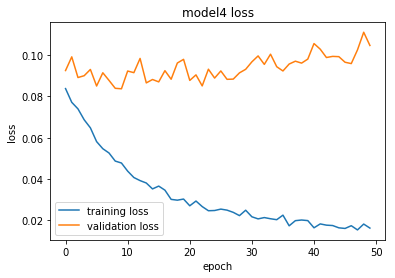

In [114]:
# plt.subplot(2,1,1)

plt.plot(hist4.history['loss'] , label = 'training loss')
plt.plot(hist4.history['val_loss'] , label = 'validation loss')
plt.title('model4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.subplot(2,1,2)
plt.plot(hist4.history['acc'], label = 'training accuracy')
plt.plot(hist4.history['val_acc'],  label = 'validation accuracy')
plt.title('model4 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()


Model4 has a complex architecture which causes it to overfits from beginning onwards as seen in plot just after 4-5 epoch model starts to overfit as validation loss continously increases on the other side training loss decreses.

For regularization here although dropout layer is added but as mentioned in blog:
https://towardsdatascience.com/dont-use-dropout-in-convolutional-networks-81486c823c16
dropout is not a fine way to regularize cnn.



### Summary of all models

In [43]:
from prettytable import PrettyTable

summ_ = PrettyTable()
print('-'*15, 'Performance comparison for CNN model with different parameters ','-'*15)
print()
column_names = ['Param/Perform', 'model1', 'model2', 'model3',
'model4']
summ_.add_column(column_names[0],['# convlayers', '#kernels(l1,l2)', 'k_Shape(l1,l2)', 
                                  'stride', 'Used Dropout','Dropout rate','Batch_norm', 'accuracy', 'result'])
summ_.add_column(column_names[1], [2, '16,16' , '(5,5),(5,5)', 1,'No','-','No', 97.81 , 'wellfit'])
summ_.add_column(column_names[2], [2, '32,32' , '(2,2),(2,2)', 1,'No','-', 'yes',98.95 , 'wellfit'])
summ_.add_column(column_names[3], [2, '64,64' , '(3,3),(3,3)', 2,'No','-','yes', 97.93 , 'underfit'])
summ_.add_column(column_names[4], [2, '64,32' , '(3,3),(2,2)', 2,'Yes','0.5','No' ,97.43 , 'overfit'])



print(summ_)
print('k_shape stands for shape of kernels used in both layers')


--------------- Performance comparison for CNN model with different parameters  ---------------

+-----------------+-------------+-------------+-------------+-------------+
|  Param/Perform  |    model1   |    model2   |    model3   |    model4   |
+-----------------+-------------+-------------+-------------+-------------+
|   # convlayers  |      2      |      2      |      2      |      2      |
| #kernels(l1,l2) |    16,16    |    32,32    |    64,64    |    64,32    |
|  k_Shape(l1,l2) | (5,5),(5,5) | (2,2),(2,2) | (3,3),(3,3) | (3,3),(2,2) |
|      stride     |      1      |      1      |      2      |      2      |
|   Used Dropout  |      No     |      No     |      No     |     Yes     |
|   Dropout rate  |      -      |      -      |      -      |     0.5     |
|    Batch_norm   |      No     |     yes     |     yes     |      No     |
|     accuracy    |    97.81    |    98.95    |    97.93    |    97.43    |
|      result     |   wellfit   |   wellfit   |   underfit  |   ove

## IMPORTANT OBSERVATION:
### On overfitting:

- Model1 : Simple architecture ----> hence no overfitting, if # epoch increase further then model starts to overfit.
- Model2 : Complex architecture --->  hence overfitting starts after 7-8 epochs , but as in 2nd run i use batch normalization layer model doesn't overfit any more.
- Model3 : Complex architecture but 1 batch normalization layer at the end of every conv or dense layer causes no learning in model and hence model underfits. 
- Model4 : Complex architecure but 3 dropout layers also ---> Still model overfits, concludes that dropout not act as good regularizer when dataset is simple or when algorithm used is CNN.

Conclusion ---> Although dropout layer helps to avoid overfitting but in CNN when dataset is not too complex, #weights are not too many hence dropout layer will not act as good regularizer, despite in CNN batch normalizing will be a good regularizer as using it model not overfits but as seen in model3 using batch normalization layer at the end of every conv layer and dense layer can cause under fitting in short no learning takes place in model.

###### Also MNIST data is not too complex dataset hence even simple CNN model works very good on the data but if building complex model its better to add dropout layer which randomly turns some neurons off and help in reducing overfitting and also improves convergence

In [41]:
print()